In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 600

Matplotlib is building the font cache; this may take a moment.


In [2]:
def integrand(u, v, epsilon=1e-3):
    return v**2 / ( (u-v)**2 + epsilon)

In [34]:
epsilon = 1e-3

u_array = np.linspace(-0.5, 0.5, 500)

quad_results = [integrate.quad(lambda v: integrand(u, v, epsilon=epsilon), a=-1, b=1) for u in u_array]
quad_values = np.array([res[0] for res in quad_results])

n_sample_array = [2**k for k in range(1,7)]

many_integrals = np.zeros((len(n_sample_array), len(u_array)))

for u_index, u in enumerate(u_array):
    for n_index, n_samples in enumerate(n_sample_array):
        v_array = np.linspace(-1, 1, n_samples)
        f_array = integrand(u, v_array, epsilon)
        integral = integrate.trapezoid(y=f_array, x=v_array)
        many_integrals[n_index, u_index] = integral

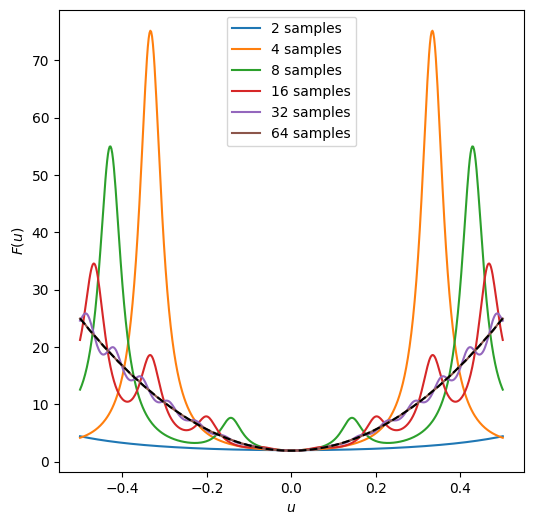

In [36]:
fig, ax = plt.subplots(figsize=(6,6))


for n_index, n in enumerate(n_sample_array):
    ax.plot(u_array, many_integrals[n_index], label=f"{n} samples")
ax.plot(u_array, quad_values, "k--")
ax.set_xlabel(r"$u$")
ax.set_ylabel(r"$F(u)$")
plt.legend()
plt.show()